In [12]:
import pyrokebabs as pb
import pandas as pd
import numpy as np
from Bio.Seq import Seq
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, LeaveOneOut, KFold
#!pip install Bio strkernel
from sklearn.svm import SVC
import time
from sklearn.model_selection import GroupKFold
from sklearn.svm import LinearSVC
import random

In [13]:
# Creates random DNA sequences

# SUBROUTINE 
# Description: creates a random string from given chars
# @Dependencies     -> None
# @Routineparams:
# letters           -> contais the letters used for creating the sequence
# @Functionparams:
# length            -> defines the final length if every sequence 
# @Return           -> returns a random DNA sequence of choosen params
def createDNA(length):
    letters = ['C','G','T','A']
    return ''.join(random.choice('CGTA') for _ in range(length))


#ROUTINE
# Description: Sets the wanted params and calls subroutine createDNA
# @Dependencies:
# numpy         -> import numpy as np
# @Routineparams:
# amount        -> the number of sequences that should be created
# seqlength     -> is the length of every sequence
# seq           -> holds the created sequences
# target        -> holds the coressponding target vector alternating between 1 and -1 every created sequence
# @Return       -> returns the created sequences and their corresponding target vector
def createDNAvec(amount,seqlength):
    amount = amount
    seqlength = seqlength
    seq = np.zeros(amount,dtype=object)
    target = np.zeros(amount)
    for i in range(amount):
        seq[i] = createDNA(seqlength)
        if i & 2 == 0:
            target[i] = 1
        else:
            target[i] = -1
    return seq,target

In [14]:
# Reads a given CSV File and splits its content into a dictionary, in this case a table for a SVM problem

# ROUTINE
# Description: reads a CSV-File and splits its content into a dictionary
# @Dependencies     -> None
# @Routineparams:
# data_raw          -> contais the unprocessed data as it was read from the CSV
# data              -> contains a dictionary with certain collums split up into arrays
# @Functionparams:
# filepath          -> contais the filepath to the CSV that should be read
# sep               -> contains the separator used in the CSV
# @Return           -> returns the dictionary containing the specified arrays
def readInput(filepath,sep):
    data_raw = pd.read_csv(filepath, sep=sep)
    data = {'data': data_raw.iloc[:, -1],
             'target': np.where(data_raw.iloc[:, 0] == '-', -1 ,1),
             'feature_names': data_raw.columns[2],
             'target_names': ['pos', 'neg']}
    return data

In [15]:
# ROUTINE 
# Description: reads a CSV-File and splits its content into a dictionary
# @Dependencies:     
# Bio.Seq           -> from Bio.Seq import Seq
# @Routineparams:
# data_transformed  -> contais an array of chars that have been converted to a sequence
# @Functionparams:
# data              -> contais an array of chars that should be converted to a sequence
# @Return           -> returns an array with sequences
def transformToSeq(data):
    dataTransformed = [Seq(x) for x in data]
    return dataTransformed    

In [16]:
# Data preprocessing
DNAS = createDNAvec(10,50)
data = readInput('testdata/promoters.csv',",")
data['data'] = transformToSeq(data['data'])


In [17]:
# Creating a PyKebabs object
flo = pb.Pybabs(data,'dna')

In [18]:
#Test unbiasedCV specKernel creation
spec_model = flo.unbiasedCV(k=2,g=0)
spec_model

SVC was choosen


(SVC(C=0.5, kernel='linear'), 0.8115468409586056, 2, 0)

In [19]:
#Test unbiasedCV gappyKernel creation
gappy_model = flo.unbiasedCV(k=4,g=2)
gappy_model

SVC was choosen


(SVC(C=0.5, kernel='linear'), 0.8937908496732025, 4, 2)

In [20]:
#Test unbiasedCV outercv,innercv and verbose
cv_model = flo.unbiasedCV(k=4,g=0,outercv=5,innercv=3,verbose=3)
cv_model

SVC was choosen
Fitting 3 folds for each of 4 candidates, totalling 12 fits
>acc=0.682, est=0.655, cfg={'C': 0.5}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
>acc=0.952, est=0.618, cfg={'C': 0.5}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
>acc=1.000, est=0.719, cfg={'C': 0.5}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
>acc=1.000, est=0.646, cfg={'C': 0.5}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
>acc=0.810, est=0.739, cfg={'C': 0.5}
Accuracy: 0.889 (0.125)


(SVC(C=0.5, kernel='linear'), 0.8887445887445887, 4, 0)

In [21]:
#Test C
c_model = flo.unbiasedCV(k=4,g=0,verbose=5, C=[1,2])
c_model

SVC was choosen
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ...............................C=1;, score=0.167 total time=   0.0s
[CV 2/3] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 3/3] END ...............................C=1;, score=0.862 total time=   0.0s
[CV 1/3] END ...............................C=2;, score=0.167 total time=   0.0s
[CV 2/3] END ...............................C=2;, score=1.000 total time=   0.0s
[CV 3/3] END ...............................C=2;, score=0.862 total time=   0.0s
>acc=0.722, est=0.676, cfg={'C': 1}
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ...............................C=1;, score=0.100 total time=   0.0s
[CV 2/3] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 3/3] END ...............................C=1;, score=0.828 total time=   0.0s
[CV 1/3] END ...............................C=2;, score=0.100 total time=   0.0s
[CV 2/3] END .......

(SVC(C=1, kernel='linear'), 0.8769063180827886, 4, 0)

In [22]:
#Test SVM
svm_model = flo.unbiasedCV(k=4,g=0,verbose=2, C=[1,2],svmc='Lib')
svm_model

Liblinear was choosen
>acc=0.722, est=0.710, cfg={'C': 1}
>acc=0.944, est=0.665, cfg={'C': 1}
>acc=0.889, est=0.676, cfg={'C': 1}
>acc=1.000, est=0.635, cfg={'C': 1}
>acc=1.000, est=0.705, cfg={'C': 1}
>acc=0.706, est=0.749, cfg={'C': 1}
Accuracy: 0.877 (0.121)


(LinearSVC(C=1), 0.8769063180827886, 4, 0)

In [23]:
#Test kernopt spec
kernoptSpec_model = flo.unbiasedCV(k=4,g=0,verbose=2,kernopt=True)
kernoptSpec_model

K=1 G=0
Kernel for k=1 and g=0 built
SVC was choosen
>acc=0.333, est=0.492, cfg={'C': 0.5}
>acc=0.667, est=0.424, cfg={'C': 4}
>acc=0.556, est=0.379, cfg={'C': 0.5}
>acc=0.444, est=0.397, cfg={'C': 0.5}
>acc=0.706, est=0.300, cfg={'C': 1}
>acc=0.412, est=0.378, cfg={'C': 0.5}
Accuracy: 0.520 (0.135)
Accuracy new best model: 0.5196078431372549
K=2 G=0
Kernel for k=2 and g=0 built
SVC was choosen
>acc=0.722, est=0.697, cfg={'C': 1}
>acc=0.889, est=0.675, cfg={'C': 0.5}
>acc=0.722, est=0.707, cfg={'C': 4}
>acc=0.889, est=0.611, cfg={'C': 0.5}
>acc=0.882, est=0.717, cfg={'C': 1}
>acc=0.765, est=0.730, cfg={'C': 0.5}
Accuracy: 0.812 (0.077)
Accuracy new best model: 0.8115468409586056
K=3 G=0
Kernel for k=3 and g=0 built
SVC was choosen
>acc=0.611, est=0.719, cfg={'C': 0.5}
>acc=0.833, est=0.674, cfg={'C': 0.5}
>acc=0.944, est=0.584, cfg={'C': 0.5}
>acc=0.944, est=0.624, cfg={'C': 0.5}
>acc=0.941, est=0.649, cfg={'C': 0.5}
>acc=0.706, est=0.772, cfg={'C': 0.5}
Accuracy: 0.830 (0.130)
Accurac

(SVC(C=0.5, kernel='linear'), 0.8769063180827886, 4, 0)

In [24]:
#Test kernopt gappy
kernoptGappy_model = flo.unbiasedCV(k=2,g=2,verbose=2, C=[1,2],kernopt=True)
kernoptGappy_model

K=1 G=1
Kernel for k=1 and g=1 built
SVC was choosen
>acc=0.778, est=0.718, cfg={'C': 1}
>acc=0.722, est=0.730, cfg={'C': 1}
>acc=0.778, est=0.694, cfg={'C': 1}
>acc=0.889, est=0.600, cfg={'C': 1}
>acc=0.882, est=0.661, cfg={'C': 1}
>acc=0.706, est=0.750, cfg={'C': 1}
Accuracy: 0.792 (0.071)
Accuracy new best model: 0.7924836601307189
K=2 G=1
Kernel for k=2 and g=1 built
SVC was choosen
>acc=0.778, est=0.665, cfg={'C': 1}
>acc=1.000, est=0.620, cfg={'C': 1}
>acc=0.944, est=0.654, cfg={'C': 1}
>acc=1.000, est=0.657, cfg={'C': 1}
>acc=1.000, est=0.727, cfg={'C': 1}
>acc=0.882, est=0.738, cfg={'C': 1}
Accuracy: 0.934 (0.082)
Accuracy new best model: 0.9340958605664488
K=1 G=2
Kernel for k=1 and g=2 built
SVC was choosen
>acc=0.778, est=0.719, cfg={'C': 1}
>acc=0.778, est=0.719, cfg={'C': 1}
>acc=0.667, est=0.717, cfg={'C': 1}
>acc=0.944, est=0.623, cfg={'C': 1}
>acc=0.882, est=0.660, cfg={'C': 1}
>acc=0.647, est=0.671, cfg={'C': 1}
Accuracy: 0.783 (0.106)
Modell has worse key figures
K=2 

(SVC(C=1, kernel='linear'), 0.9340958605664488, 2, 2)

In [25]:
#Test sparse,norm and gram specKernel creation
spec_modelparams = flo.unbiasedCV(k=2,g=0,norm=True,sparse=True,gram=True)
spec_modelparams

SVC was choosen


(SVC(C=4, kernel='linear'), 0.1781045751633987, 2, 0)

In [26]:
#Test grouped-crossval
groups = [0,1,2,3,4,5,2,3,0,1,0,1,2,3,0,1,2,3,0,1,0,1,2,3,0,1,2,3,4,5,0,1,2,3,0,1,2,3,0,1,0,1,2,3,0,1,2,3,0,1,0,1,2,3,0,1,2,3,0,1,0,1,2,3,0,1,2,3,0,1,0,1,2,3,0,1,2,3,0,1,0,1,2,3,0,1,2,3,0,1,0,1,2,3,0,1,2,3,0,1,0,1,2,3,0,1]
flo.groupedCV(4,0,groups,verbose=3)

SVC was choosen
TRAIN INDEXES: [  0   2   3   4   5   6   7   8  10  12  13  14  16  17  18  20  22  23
  24  26  27  28  29  30  32  33  34  36  37  38  40  42  43  44  46  47
  48  50  52  53  54  56  57  58  60  62  63  64  66  67  68  70  72  73
  74  76  77  78  80  82  83  84  86  87  88  90  92  93  94  96  97  98
 100 102 103 104], TEST INDEXES: [  1   9  11  15  19  21  25  31  35  39  41  45  49  51  55  59  61  65
  69  71  75  79  81  85  89  91  95  99 101 105]

Fitting 3 folds for each of 4 candidates, totalling 12 fits
>acc=0.967, est=0.646, cfg={'C': 0.5}
TRAIN INDEXES: [  1   2   3   4   5   6   7   9  11  12  13  15  16  17  19  21  22  23
  25  26  27  28  29  31  32  33  35  36  37  39  41  42  43  45  46  47
  49  51  52  53  55  56  57  59  61  62  63  65  66  67  69  71  72  73
  75  76  77  79  81  82  83  85  86  87  89  91  92  93  95  96  97  99
 101 102 103 105], TEST INDEXES: [  0   8  10  14  18  20  24  30  34  38  40  44  48  50  54  58  60  64
  68  70 

(SVC(C=0.5, kernel='linear'), 0.9650793650793651)

In [27]:
#Test kernelcreation spec
kernel = flo.createKernel(6,0,sparse=False,gram=False,norm=True)

In [28]:
#Test kernelcreation gappy
kernel = flo.createKernel(4,2,sparse=True,gram=False,norm=True)

In [29]:
#Test SVM-model creation
model = flo.pybabsSVMtrain(4,0,0.0125)

SVC was choosen


In [30]:
df,dict = flo.getWeights(model)
df1,dict1 = flo.getWeights(spec_model)
df

,letters,val
252,TTTA,0.135889
15,AATT,0.127870
0,AAAA,0.121930
204,TATA,0.112215
255,TTTT,0.107482
...,...,...
113,CTAC,-0.105530
210,TCAG,-0.112030
73,CAGC,-0.114683
116,CTCA,-0.130428


Prediction profiles are generated with k = 4
Profile is generated for Seq:ctatatgcgctcatacgatatgaacgttgagactgccgctgagttatcagctgtgaa


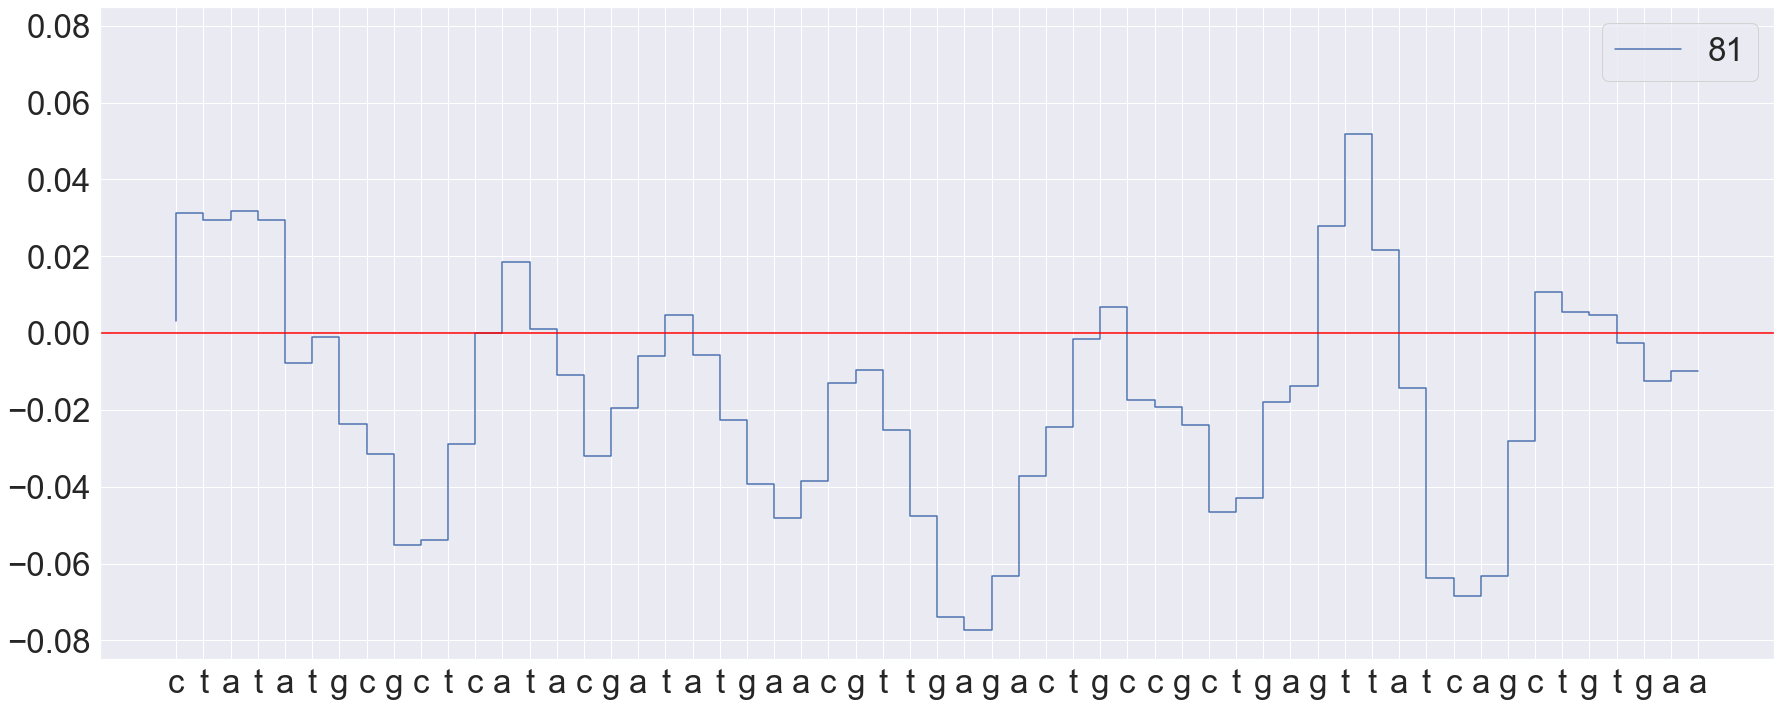

In [31]:
flo.getPredProfile(model,80)

Prediction profiles are generated with k = 2
Profile is generated for Seq:ctatatgcgctcatacgatatgaacgttgagactgccgctgagttatcagctgtgaa


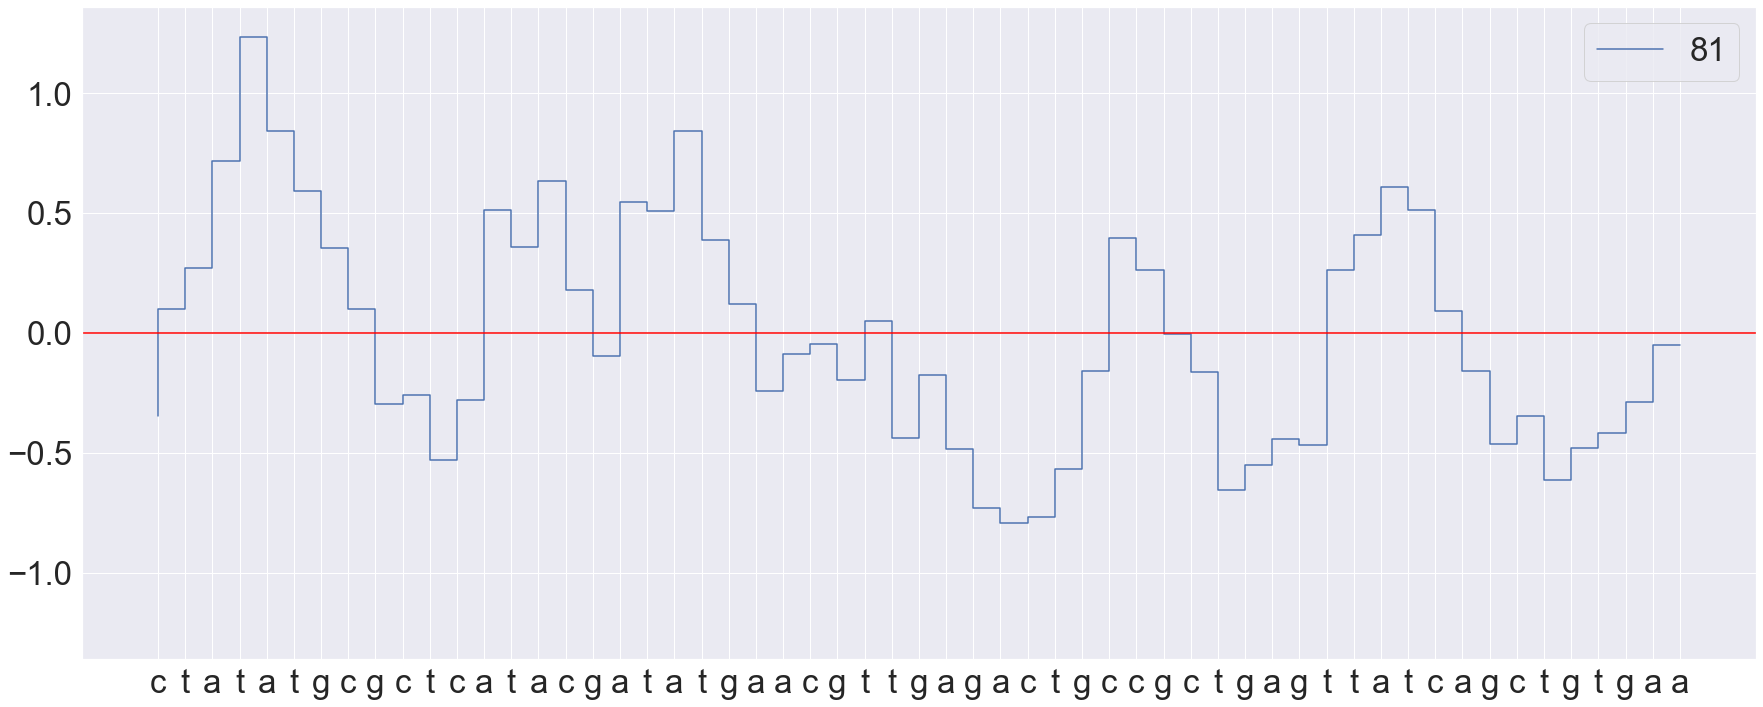

In [32]:
flo.getPredProfile(spec_model,80)